In [1]:
import sys
# enable importing the modules from probcalkge
sys.path.append('../')
sys.path.append('../probcalkge')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from probcalkge import Experiment, ExperimentResult
from probcalkge import get_calibrators
from probcalkge import get_datasets,  get_kgemodels
from probcalkge import brier_score, negative_log_loss, ks_error, ece

In [2]:
cals = get_calibrators()
kges = get_kgemodels()
ds = get_datasets()

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


In [4]:
exp = Experiment(
    cals=[cals.uncal, cals.platt, cals.isot, ], 
    datasets=[ds.yago39], 
    kges=[ kges.distMult, kges.hoLE], 
    metrics=[ece]
    )

In [5]:
exp.train_kges()

training DistMult on YAGO39 ...


Average DistMult Loss:   0.375038: 100%|██████████| 100/100 [38:14<00:00, 22.95s/epoch]


training HolE on YAGO39 ...


Average HolE Loss:   0.774206: 100%|██████████| 100/100 [2:01:33<00:00, 72.94s/epoch] 


In [6]:
exp.save_trained_kges('../saved_models/newyago/')

made model directory: ../saved_models/newyago/
saved ../saved_models/newyago/YAGO39-DistMult.pkl.
saved ../saved_models/newyago/YAGO39-HolE.pkl.


In [7]:
exp = Experiment(
    cals=[cals.uncal, cals.platt, cals.isot, ], 
    datasets=[ds.yago39], 
    kges=[ kges.complEx], 
    metrics=[ece]
    )
exp.train_kges()
exp.save_trained_kges('../saved_models/newyago/')

training ComplEx on YAGO39 ...


Average ComplEx Loss:   0.165952: 100%|██████████| 100/100 [1:59:29<00:00, 71.70s/epoch] 


saved ../saved_models/newyago/YAGO39-ComplEx.pkl.


In [4]:
from ampligraph.latent_features import ComplEx
from ampligraph.utils import save_model, restore_model

cpm1 = ComplEx(loss='nll', verbose=True)
cpm1.fit(ds.fb13.X_train)
save_model(cpm1, 'complex_nll.pkl')

cpm2 = ComplEx(loss='absolute_margin', verbose=True)
cpm2.fit(ds.fb13.X_train)
save_model(cpm2, 'complex_margin.pkl')


Average ComplEx Loss: -3735.530724: 100%|██████████| 100/100 [28:21<00:00, 17.01s/epoch]


0.5521026462160795


(array([41210.,  2019.,   658.,   429.,   382.,   316.,   305.,   353.,
          477.,  1315.]),
 array([6.7532049e-11, 9.9999145e-02, 1.9999829e-01, 2.9999742e-01,
        3.9999658e-01, 4.9999571e-01, 5.9999484e-01, 6.9999397e-01,
        7.9999316e-01, 8.9999229e-01, 9.9999142e-01], dtype=float32),
 <BarContainer object of 10 artists>)

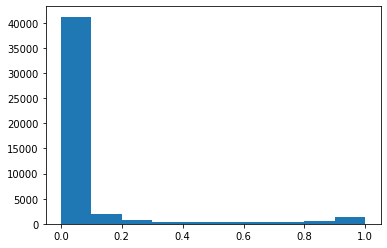

In [7]:
from sklearn.metrics import accuracy_score
from scipy.special import expit

scores1 = cpm1.predict(ds.fb13.X_test)
probs1 = expit(scores1)
print(accuracy_score(ds.fb13.y_test, probs1>0.5))
plt.hist(probs1)

0.6154348558907804


(array([9.9830e+03, 5.1000e+01, 4.0000e+01, 3.0000e+01, 3.0000e+01,
        2.5000e+01, 2.5000e+01, 3.4000e+01, 5.2000e+01, 3.7194e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

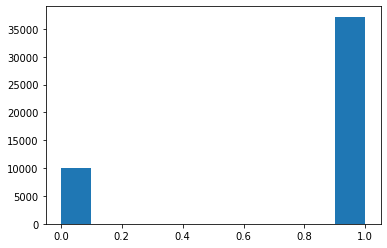

In [8]:
scores2 = cpm2.predict(ds.fb13.X_test)
probs2 = expit(scores2)
print(accuracy_score(ds.fb13.y_test, probs2>0.5))
plt.hist(probs2)

Average ComplEx Loss:   0.814738: 100%|██████████| 100/100 [42:30<00:00, 25.50s/epoch]


0.6445937974043485


(array([ 7557., 10729.,  7962.,  7109.,  4096.,  2407.,  2008.,  1854.,
         1996.,  1746.]),
 array([9.3179842e-04, 1.0055597e-01, 2.0018014e-01, 2.9980433e-01,
        3.9942849e-01, 4.9905267e-01, 5.9867686e-01, 6.9830102e-01,
        7.9792517e-01, 8.9754939e-01, 9.9717355e-01], dtype=float32),
 <BarContainer object of 10 artists>)

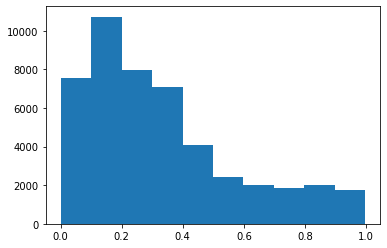

In [9]:
cpm3 = ComplEx(loss='nll', verbose=True, regularizer='LP', regularizer_params={'p': 3, 'lambda':0.1})
cpm3.fit(ds.fb13.X_train)
save_model(cpm3, 'complex_nll_reg.pkl')

scores3 = cpm3.predict(ds.fb13.X_test)
probs3 = expit(scores3)
print(accuracy_score(ds.fb13.y_test, probs3>0.5))
plt.hist(probs3)